In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
#
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
# from sklearn.metrics import accuracy_score, precision_recall_curve, plot_roc_curve, plot_confusion_matrix
# from sklearn.metrics import SCORERS, plot_precision_recall_curve
from sklearn.metrics import *
from sklearn.utils import parallel_backend
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Constants
SEED = 87654

In [2]:
model = joblib.load('../models/fitted-nnet-activation-logistic.joblib')
# model

In [3]:
new_data = pd.read_csv('../data/new-data-to-predict.csv', na_values=['NA', 'NaN', 'Inf', '-Inf'])

####
# Obvs don't use these
id_vars = ['system_key', 'yrq']
target = 'Y'
####

# new_data = recode_cats(new_data, cat_var_list)
new_x_vars = [x for x in new_data.columns if x not in [target]]
new_x_vars = [x for x in new_x_vars if x not in id_vars]
new_x = new_data[new_x_vars]
# missing_vars = [x for x in x_vars if x not in new_x_vars]
# missing_vars = dict((x, np.nan) for x in missing_vars)

new_preds = model.predict(new_x)
new_predsa = model.predict_proba(new_x)

In [4]:
new_predsa[0:10,]

array([[0.77003955, 0.22996045],
       [0.96065931, 0.03934069],
       [0.92729648, 0.07270352],
       [0.86428345, 0.13571655],
       [0.00157773, 0.99842227],
       [0.8733425 , 0.1266575 ],
       [0.92258013, 0.07741987],
       [0.76678774, 0.23321226],
       [0.98487493, 0.01512507],
       [0.96356647, 0.03643353]])

(array([1169., 1348., 1070.,  708.,  494.,  364.,  286.,  228.,  256.,
         574.]),
 array([0.0010178 , 0.10088673, 0.20075567, 0.3006246 , 0.40049353,
        0.50036246, 0.60023139, 0.70010032, 0.79996925, 0.89983818,
        0.99970711]),
 <a list of 10 Patch objects>)

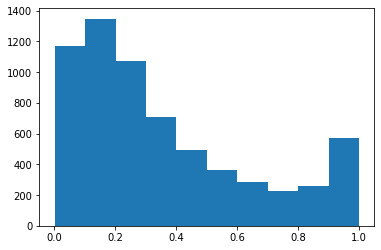

In [5]:
# prob of `1``
plt.hist(new_predsa[:,1])

In [6]:
# new_data[id_vars]
df = new_data[id_vars]
df = df.assign(pred0 = new_predsa[:,0],
               pred1 = new_predsa[:,1])

df.head()

,system_key,yrq,pred0,pred1
0,20634,20202,0.770040,0.229960
1,113936,20202,0.960659,0.039341
2,119434,20202,0.927296,0.072704
3,126198,20202,0.864283,0.135717
4,126647,20202,0.001578,0.998422


In [9]:
outpath = '../data-preds/'
fname = 'pred-proba-' + str(df['yrq'][0]) + '.csv'
print('writing preds to:', outpath + fname)
df.to_csv(outpath + fname, index = False)

writing preds to: ../data-preds/pred-proba-20202.csv
